<a href="https://colab.research.google.com/github/Saaras225/mushroom-dataScience/blob/main/ProyectoFinal_Guarguana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curso Data Science.

Alumna: Kerlismar Sarays Guarguana Yance.

Entrega Proyecto Final

url_dataset = https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download

download_cvs_drive = https://drive.google.com/file/d/1oKnZmBULXxtHlRiyO3UbMUf5Um_k2_s7/view?usp=drive_link

##Entrenamiento modelo de identificación de hongos
En el dataset que se utiliza para la realización de la asignación, está compuesta por la diversas categorías que presentan los hongos en cuanto a forma, color, olor, etc. Con esta información se puede determinar si un hongo es o no comestible mediante un modelo que pueda determinarlo en base a una serie de cualidades a comparar.


#Tabla de Contenido
1. [Preparación de datos](#preparacion)
2. [EDA: Exploratory Data Analysis](#representacion)
3. [Entrenamiento de modelo](#entrenamiento)


#Preparación de datos <a name="preparacion"></a>

In [431]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv('/content/mushrooms.csv')

In [432]:
##leemos el documento nombrado como data el cual está compuesto por 23 columnas
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [433]:
##vemos la información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [434]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [435]:
##verificamos la cantidad de datos que son de tipo objeto
datos_categoricos = data.select_dtypes(include='object')
datos_categoricos

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [436]:
## este for se hizo para visualizar de una manera mas sencilla las clases, su largo y los valores por clase
for i in data.columns:
    x = len(data[i].value_counts())
    print("NAME:",i,"LENGTH:",x,"VALUES:",data[i].unique())

NAME: class LENGTH: 2 VALUES: ['p' 'e']
NAME: cap-shape LENGTH: 6 VALUES: ['x' 'b' 's' 'f' 'k' 'c']
NAME: cap-surface LENGTH: 4 VALUES: ['s' 'y' 'f' 'g']
NAME: cap-color LENGTH: 10 VALUES: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
NAME: bruises LENGTH: 2 VALUES: ['t' 'f']
NAME: odor LENGTH: 9 VALUES: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
NAME: gill-attachment LENGTH: 2 VALUES: ['f' 'a']
NAME: gill-spacing LENGTH: 2 VALUES: ['c' 'w']
NAME: gill-size LENGTH: 2 VALUES: ['n' 'b']
NAME: gill-color LENGTH: 12 VALUES: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
NAME: stalk-shape LENGTH: 2 VALUES: ['e' 't']
NAME: stalk-root LENGTH: 5 VALUES: ['e' 'c' 'b' 'r' '?']
NAME: stalk-surface-above-ring LENGTH: 4 VALUES: ['s' 'f' 'k' 'y']
NAME: stalk-surface-below-ring LENGTH: 4 VALUES: ['s' 'f' 'y' 'k']
NAME: stalk-color-above-ring LENGTH: 9 VALUES: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
NAME: stalk-color-below-ring LENGTH: 9 VALUES: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
NAME: veil-type LENGTH: 1 

1.- DISTRIBUCIÓN DE LA MUESTRA POR TIPOS COMESTIBLES Y VENENOSOS

#EDA= Exploratory Data Analysis<a name="representacion"></a>

In [437]:
##obtenemos el valor total de los items dentro de la columna class, e=edible/comestible y p=poisonous/venenoso
classType = data['class'].value_counts()
classType

e    4208
p    3916
Name: class, dtype: int64

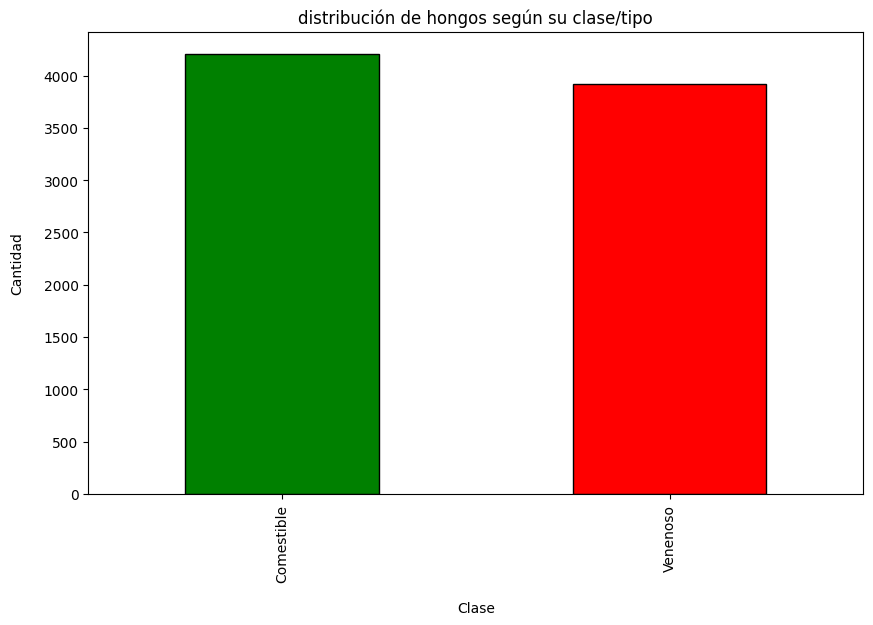

In [438]:
##se representan los valores en un bar plot donde podemos observar los casos de hongos venenosos(rojos) son menos por muy poco
##en relación a los hongos comestibles (Verdes)
plt.figure(figsize=(10,6))
classType.plot(kind='bar', color=['green', 'red'], ec='k')
plt.xlabel("Clase", labelpad=14)
plt.ylabel("Cantidad", labelpad=14)
plt.title("distribución de hongos según su clase/tipo")
plt.xticks(ticks=[0, 1], labels=["Comestible", "Venenoso"]);

In [439]:
##ahora solo queremos obtener una data con todas las caracteristicas que representan a los comestible y los venenosos
##creamos el df dataPoison con los datos de clase tipo p
poison = data[data['class'] == 'p']
edible = data[data['class'] == 'e']
dataPoison = pd.DataFrame(poison)
dataPoison

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
13,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
17,p,x,s,n,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d


In [440]:
##creamos otro df con los datos de clase tipo e
dataEdible = pd.DataFrame(edible)
dataEdible

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l


In [441]:
##ahora se procede a obtener los valores totales por color de la capucha de los hongos de tipo venenosos
poisonColor = dataPoison['cap-color'].value_counts()
poisonColor

n    1020
e     876
g     808
y     672
w     320
b     120
p      88
c      12
Name: cap-color, dtype: int64

In [442]:
##obtenemos el rango y longitud del total de colores para poder obtener la cantidad de columnas a representar
rangePoisonClass = list(range(len(poisonColor)))
rangePoisonClass

[0, 1, 2, 3, 4, 5, 6, 7]

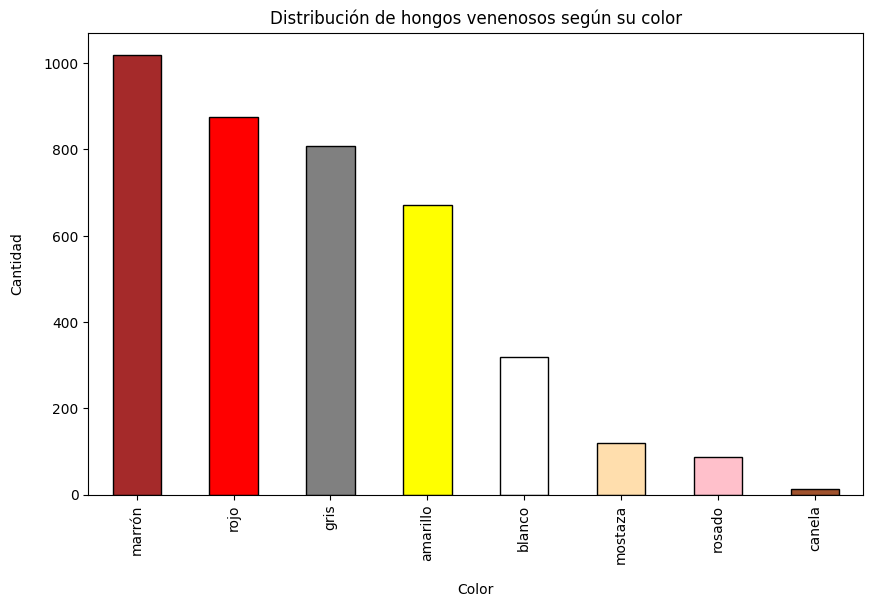

In [443]:
##representación de los hongos de tipo venenosos en base al color de su capucha
## podemos ver que los de color marrón son los más comunes, seguido por los de color rojo y gris
plt.figure(figsize=(10,6))
poisonColor.plot(kind='bar',color=["brown","red","gray","yellow","white","navajowhite","pink","sienna"],ec='k')
plt.xlabel("Color", labelpad=14)
plt.ylabel("Cantidad", labelpad=14)
plt.title("Distribución de hongos venenosos según su color")
plt.xticks(ticks=rangePoisonClass, labels=["marrón","rojo","gris","amarillo","blanco","mostaza","rosado","canela"]);

In [444]:
##representación de los hongos de tipo venenosos en base al color de su capucha
## podemos ver que los de color marrón son los más comunes, seguido por los de color rojo y gris
edibleColor =  dataEdible['cap-color'].value_counts()
edibleColor

n    1264
g    1032
w     720
e     624
y     400
p      56
b      48
c      32
u      16
r      16
Name: cap-color, dtype: int64

In [445]:
rangeEdibleClass = list(range(len(edibleColor)))
rangeEdibleClass

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

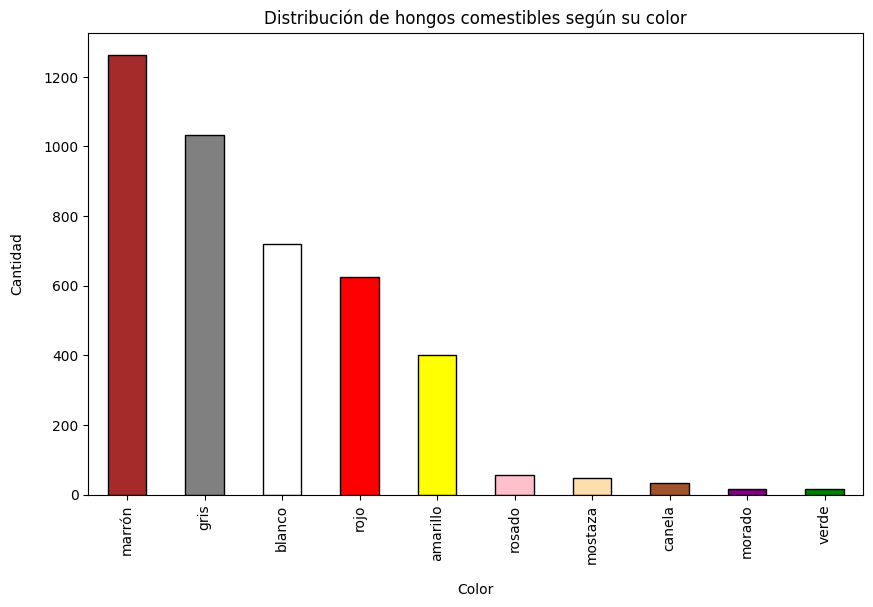

In [446]:
##representación de los hongos de tipo comestibles en base al color de su capucha
## podemos ver qu en el caso de los comestibles, se mantienen los de color marrón como los más comunes, seguido por los de color gris y blanco
plt.figure(figsize=(10,6))
edibleColor.plot(kind='bar',color=["brown","gray","white","red","yellow","pink","navajowhite","sienna","purple", "green"],ec='k')
plt.xlabel("Color", labelpad=14)
plt.ylabel("Cantidad", labelpad=14)
plt.title("Distribución de hongos comestibles según su color")
plt.xticks(ticks=rangeEdibleClass, labels=["marrón","gris","blanco","rojo","amarillo","rosado","mostaza","canela","morado","verde"]);

In [447]:
##ahora tomando en cuenta el total por tipo (comestibles y venenosos) por el color de su capucha
##se hace un analisis comparativo de los dos en contra para ver las diferencias uno vs el otro
##se crean dos df(dataFrame) por tipo con su total(Tabla Edible y tabla Poison)
valoresEdible = edibleColor
edibleDf = {
    'color':valoresEdible.index,
    'total': valoresEdible.values,
}
tablaEdible = pd.DataFrame(edibleDf)
tablaEdible

,color,total
0,n,1264
1,g,1032
2,w,720
3,e,624
4,y,400
5,p,56
6,b,48
7,c,32
8,u,16
9,r,16


In [448]:
valoresPoison = poisonColor
valoresPoison

n    1020
e     876
g     808
y     672
w     320
b     120
p      88
c      12
Name: cap-color, dtype: int64

In [449]:
valoresPoison = poisonColor
poisonDf = {
    'color':valoresPoison.index,
    'total': valoresPoison.values,
}
tablaPoison = pd.DataFrame(poisonDf)
tablaPoison

,color,total
0,n,1020
1,e,876
2,g,808
3,y,672
4,w,320
5,b,120
6,p,88
7,c,12


In [450]:
##y luego se procede a unir ambas tablas por su item en común (color) mediante un merge de tipo outer.
##se reemplazan los valores NaN por el valor 0.
##se convierten los valores con decimales a enteros con el método astype(int)
##se renombran algunas columnas
union_outer = pd.merge(tablaEdible, tablaPoison, on='color', how='outer')
union_outer['total_y'] = union_outer['total_y'].fillna(0)
union_outer['total_y'] = union_outer['total_y'].astype(int)
union_outer= union_outer.rename(columns={'total_x':'total_edible', 'total_y':'total_poison'})
union_outer

,color,total_edible,total_poison
0,n,1264,1020
1,g,1032,808
2,w,720,320
3,e,624,876
4,y,400,672
5,p,56,88
6,b,48,120
7,c,32,12
8,u,16,0
9,r,16,0


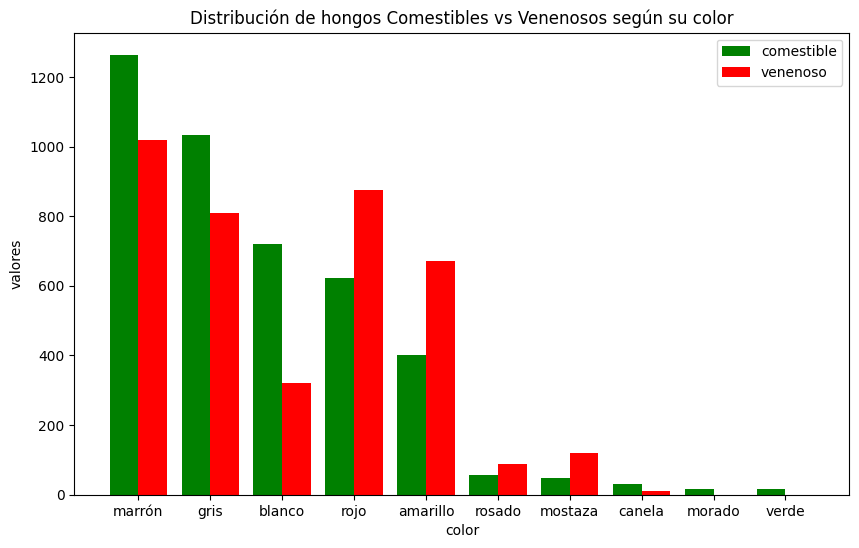

In [451]:
##se grafica el resultado del merge de tipo outer
##a simple vista observamos que los hongos con el capuchin de color morado o verse son de tipo comestibles unicamente
ticksColors = ['marrón','gris','blanco','rojo','amarillo','rosado','mostaza','canela','morado','verde']
x=np.arange(len(union_outer['color']))
ancho_barra = 0.40
plt.figure(figsize=(10,6))
plt.bar(x - ancho_barra/2, union_outer['total_edible'], width=ancho_barra, label='comestible', color='green')
plt.bar(x + ancho_barra/2, union_outer['total_poison'], width=ancho_barra, label='venenoso', color='red')
plt.xlabel('color')
plt.ylabel('valores')
plt.title('Distribución de hongos Comestibles vs Venenosos según su color')
plt.xticks(x, ticksColors)
plt.legend()
plt.show()

PIE SHARP SEGUN LA CANTIDAD DE ANILLOS QUE POSEE

In [452]:
##otra caracteristicas visible dentro de los hongos es la cantidad de anillos que poseen en su torso
##por lo cual se realiza un conteo de los mismos
ringsData = data['ring-number'].value_counts()
ringLabels = ['uno', 'dos','ninguno']
ringsData

o    7488
t     600
n      36
Name: ring-number, dtype: int64

Text(0.5, 1.0, 'Distribución por cantidad de anillos')

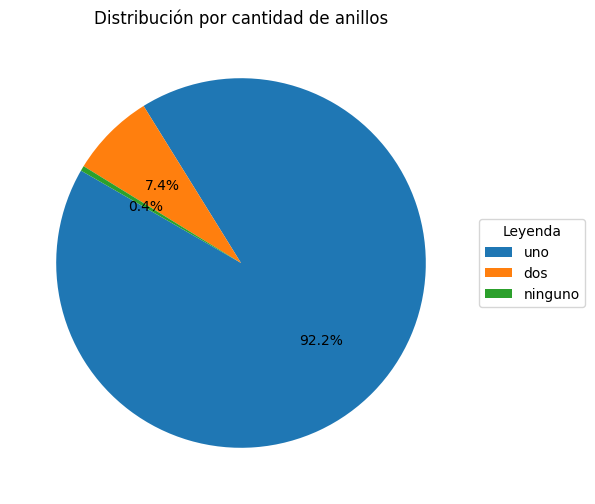

In [453]:
##procedemos a graficar mediante un pie chart y podemos observar que el 92% de los mismos posee un anillo
plt.figure(figsize=(6, 6))
plt.pie(ringsData, autopct='%1.1f%%', startangle=150)
plt.legend(ringLabels, title="Leyenda", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribución por cantidad de anillos')

PIE SHARP SEGUN SU FORMA

In [454]:
##queremos saber tambien la distribución en base a la forma de los hongos
##por lo cual tomamos la columna shape y contamos todos sus valores
shapeData = data['cap-shape'].value_counts()
shapeData

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [455]:
##en base a los resultados obtenidos en el conteo de valores, se crea un objeto con los nombres de las categorias obtenidas
##a fin de ofrecer una visualización mas informativa
shapeLabels = ['convexa', 'plana','nudosa','acampanada','hundida','conica']

Text(0.5, 1.0, 'Distribución por forma de sombrero')

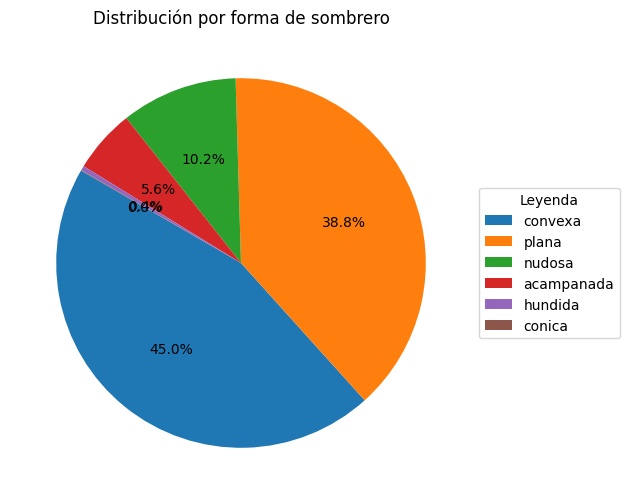

In [456]:
plt.figure(figsize=(6, 6))
plt.pie(shapeData.values, autopct='%1.1f%%', startangle=150)
plt.legend(shapeLabels, title="Leyenda", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribución por forma de sombrero')

PIE SHARP SEGUN SU OLOR

In [457]:
##distribución en base al olor de los hongos
##contamos los valores totales de la columna odor
odorData = data['odor'].value_counts()
odorData

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [458]:
##en base a los resultados obtenidos en el conteo de valores, se crea un objeto con los nombres de las categorias obtenidas
##a fin de ofrecer una visualización mas informativa
odorLabels = ['ninguno','fétido','pescado','picante','almendrado','anisado','penetrante','creosota','rancio']

Text(0.5, 1.0, 'Distribución por olor')

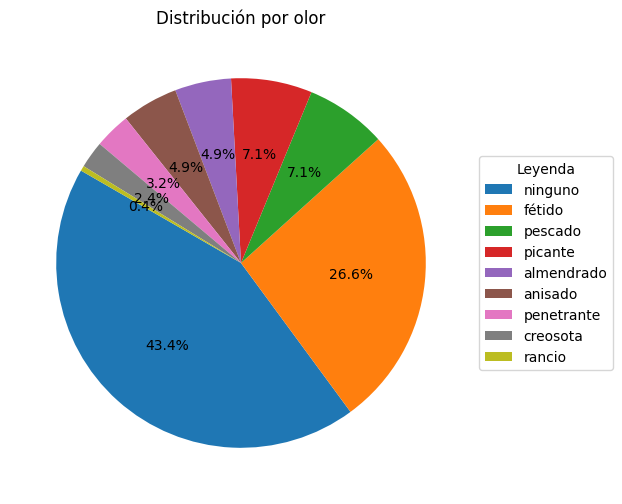

In [459]:
plt.figure(figsize=(6, 6))
plt.pie(odorData.values, autopct='%1.1f%%', startangle=150)
plt.legend(odorLabels, title="Leyenda", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribución por olor')

#Entrenamiento de modelo que identifique/prediga la clase (comestible/venenoso) de un hongo.<a name="entrenamiento"></a>

variables Dummies

In [460]:
## creamos una lista de las variables que serán transformadas con el métodos get_dummies
col_dum= ["cap-shape", "cap-surface", "cap-color", "gill-attachment", "gill-spacing", "gill-color", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-color", "ring-type", "spore-print-color", "population", "habitat"]
data_dum = data[col_dum]
data_toDummies = pd.get_dummies(data_dum)
data_toDummies


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [461]:
##Luego procedemos a concatenar las variables dummies transformadas al la tabla principal Data
data = pd.concat([data, data_toDummies], axis=1)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,x,s,n,t,p,f,c,n,k,...,1,0,0,0,0,0,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,0,0,0,0,1,0,0,0,0,0
2,e,b,s,w,t,l,f,c,b,n,...,0,0,0,0,0,0,1,0,0,0
3,p,x,y,w,t,p,f,c,n,n,...,1,0,0,0,0,0,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,0,0,0,0,0,1,0,0,0,0
8120,e,x,s,n,f,n,a,c,b,y,...,0,1,0,0,0,1,0,0,0,0
8121,e,f,s,n,f,n,a,c,b,n,...,0,0,0,0,0,1,0,0,0,0
8122,p,k,y,n,f,y,f,c,n,b,...,0,1,0,0,0,1,0,0,0,0


In [462]:
## Eliminamos las columnas "madres" de las variables dummies ya que al no ser numéricas afectarían el entrenamiento del modelo
data= data.drop(col_dum, axis=1)
data

,class,bruises,odor,gill-size,stalk-shape,veil-type,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,t,p,n,e,p,o,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,e,t,a,b,e,p,o,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,e,t,l,b,e,p,o,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,p,t,p,n,e,p,o,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,f,n,b,t,p,o,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,f,n,b,e,p,o,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,e,f,n,b,e,p,o,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,e,f,n,b,e,p,o,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,p,f,y,n,t,p,o,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [463]:
##procedemos a reemplazar a 1 o 0 a las columnas que solo contienen 2 valores
data['class'].unique()

array(['p', 'e'], dtype=object)

In [464]:
data_class = {"class": {'p':1, 'e':0}}
data.replace(data_class, inplace= True)

In [465]:
data["bruises"].unique()

array(['t', 'f'], dtype=object)

In [466]:
data_bruises = {"bruises": {'t': 1, 'f':0 }}
data.replace(data_bruises, inplace= True)

In [467]:
data["gill-size"].unique()

array(['n', 'b'], dtype=object)

In [468]:
data_gillSize = {"gill-size": {'n': 1, 'b':0 }}
data.replace(data_gillSize, inplace= True)

In [469]:
data["stalk-shape"].unique()

array(['e', 't'], dtype=object)

In [470]:
data_stalkShape = {"stalk-shape": {'n': 1, 'b':0 }}
data.replace(data_stalkShape, inplace= True)

In [471]:
data["veil-type"].unique()

array(['p'], dtype=object)

In [472]:
data_veilType = {"veil-type": {'p': 1, 'u':0 }}
data.replace(data_veilType, inplace= True)

In [473]:
data["stalk-shape"].unique()

array(['e', 't'], dtype=object)

In [474]:
data_stalkShape = {"stalk-shape": {'e':0, 't':1}}
data.replace(data_stalkShape, inplace= True)

In [475]:
data["ring-number"].unique()

array(['o', 't', 'n'], dtype=object)

In [476]:
data_ringNumber = {"ring-number": {'n': 1, 'o':2, 't':3}}
data.replace(data_ringNumber, inplace= True)

In [477]:
data["odor"].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [478]:
## en el caso de odor, será nuestra columna targe por lo cual sus valores serán reemplazados númericamente comenzando de 1 en adelante
## y luego reemplazados en la tabla data
data_odor = {"odor": {'p':1, 'a':2, 'l':3, 'n':4, 'f':5, 'c':6, 'y':7, 's':8, 'm':9}}
data.replace(data_odor, inplace= True)

In [479]:
data

,class,bruises,odor,gill-size,stalk-shape,veil-type,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,1,0,1,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,2,0,0,1,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,3,0,0,1,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,1,0,1,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,4,0,1,1,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,4,0,0,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,4,0,0,1,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,4,0,0,1,2,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,7,1,1,1,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [480]:
## separamos nuestra muestra x, sacando la columna class
X = data.drop(columns=['class'], axis=1)
X

,bruises,odor,gill-size,stalk-shape,veil-type,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,2,0,0,1,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,3,0,0,1,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,4,0,1,1,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,0,0,1,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,4,0,0,1,2,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,4,0,0,1,2,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,7,1,1,1,2,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [481]:
## apartamenos nuestra set y el cual será nuestra columna target
y = data["class"]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [482]:
## obtenemos el tamaño de la muestra X y la muestra y
X.shape, y.shape

((8124, 104), (8124,))

***Linear Regression***

In [483]:
## en este caso vamos a crear 4 variables (X_train, X_test, Y_train, Y_test)
## que saldran de los datos guardados en las variables X y Y donde a su vez dividiremos las muestra
## en 2 segmentos 80% y 20% (test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state=42)

In [484]:
## visualizamos nuestro set de data de entrenamiento y data de test
print("training set: ", X_train.shape, y_train.shape)
print("test set: ", X_test.shape, y_test.shape)

training set:  (6499, 104) (6499,)
test set:  (1625, 104) (1625,)


In [485]:
##con el método LinearRegression.fit usamos las variables X y Y (train)
##para entrenar el modelo
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [486]:
##usamos el método predict con X_test y visualizamos el tamaño total de la muestra
y_pred = clf.predict(X_test)
y_pred.shape

(1625,)

-métricas modelo

In [487]:
## r2 es la varizanza de la variable independiente (class), que tan bien se adapta el modelo a la data, mientras mas alto es mejor
## en el caso de mse mientras mas bajo sea es mejor, porq hace referencia al rate de error en la predicción
## y por ultimo mae es la distancia absoluta entre los valores, por lo que al igual que el mse, mientras mas bajo sea mejor
## la intercepción hace referencia a la distancia que hay entre el test evaluado y los valores independientes de la data

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept= clf.intercept_

print("r2 score:", r2)
print("Mean squeared score:", mse)
print("Mean absolute score:", mae)
print("intercept:", intercept)

r2 score: 0.9968724372399694
Mean squeared score: 0.0007807888996142607
Mean absolute score: 0.014463003305288461
intercept: 140550936339.36368


Text(0.5, 1.0, 'Predicción vs Prueba')

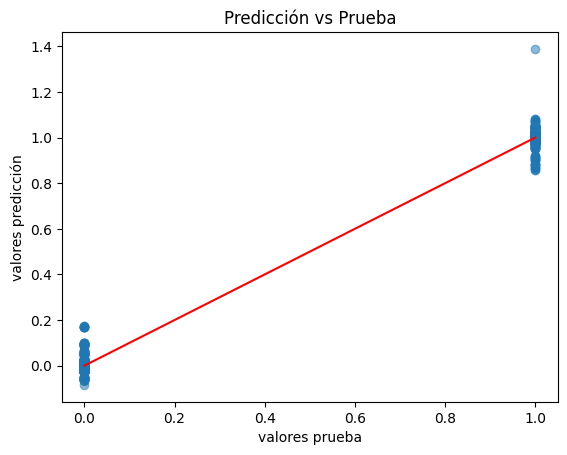

In [488]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("valores prueba")
plt.ylabel("valores predicción")
plt.title("Predicción vs Prueba")

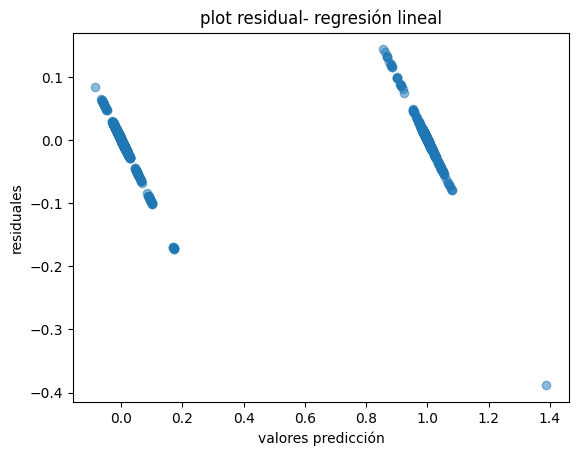

In [489]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel("valores predicción")
plt.ylabel('residuales')
plt.title('plot residual- regresión lineal')
plt.show()


***Random Forest<a name="tree"></a>***

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state=50)

In [491]:
##aplicamos el modelo
model = RandomForestClassifier(random_state=42, n_estimators=100,
                                     class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [492]:
## obtenemos la predicción con la data de reserva a testear
y_pred= model.predict(X_test)
y_proba= model.predict_proba(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [493]:

y_proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ]])

In [494]:
##visualizamos el predict_proba
y_proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ]])

-Métricas Modelo

In [495]:
#accuracy
## obtenemos que el score de predicción del modelo es de 100%
model.score(X_test, y_test)

1.0

Text(0.5, 1.1, 'matriz de confusión')

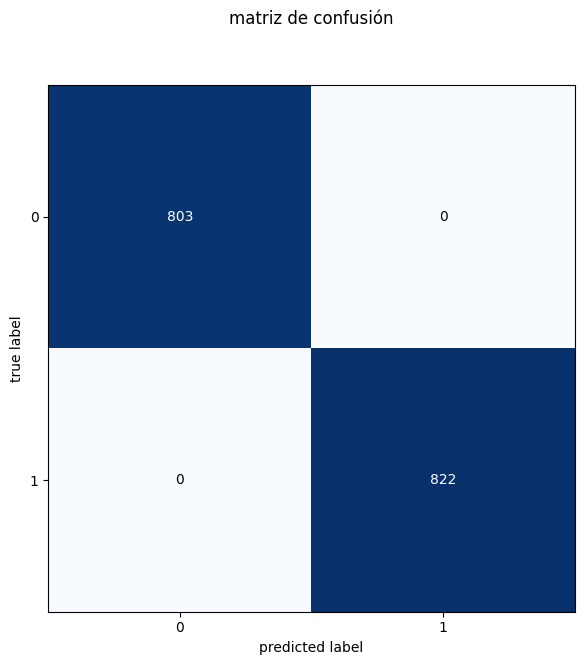

In [496]:
##en el plot de matriz de confusión podemos observar en la diagonal principal los elementos que fueron correctamente clasificados
#confusión
y_pred = model.predict(X_test)
y_proba= model.predict_proba(X_test)
matriz = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat= matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()
plt.title('matriz de confusión', y=1.1)

In [497]:
#precisión
precision_score(y_test, y_pred, average='micro')

1.0

In [498]:
#recall
recall_score(y_test, y_pred, average='micro')

1.0

In [499]:
#f1_score
f1_score(y_test, y_pred, average='micro')

1.0

***Decision Tree*** <a name="tree"></a>


In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state=60)

In [501]:
##utilizamos las muestras de train y testeos del test anterior y procedemos a
##aplicarlas al modelo de arbol de decisión para su entramiento con el método fit
tdm = DecisionTreeClassifier(max_depth=4, random_state = 42)
tdm.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [502]:
##Prediccion de data a testear (X_test)
y_pred = tdm.predict(X_test)
y_proba = tdm.predict_proba(X_test)

In [503]:
##luego con el modelo ya entrenado con la muestra train
##procedemos a obtener la predicción con la muestra X_test
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [504]:
##visualizamos el predict_proba
y_proba

array([[0.        , 1.        ],
       [0.99469496, 0.00530504],
       [0.        , 1.        ],
       ...,
       [0.99469496, 0.00530504],
       [0.        , 1.        ],
       [0.        , 1.        ]])

-Métricas Modelo

In [505]:
##medimos su accuracy con el método score
## y obtenemos casi el mismo score del modelo anterior 99%
tdm.score(X_test, y_test)

0.9963076923076923

Text(0.5, 1.1, 'matriz de confusión')

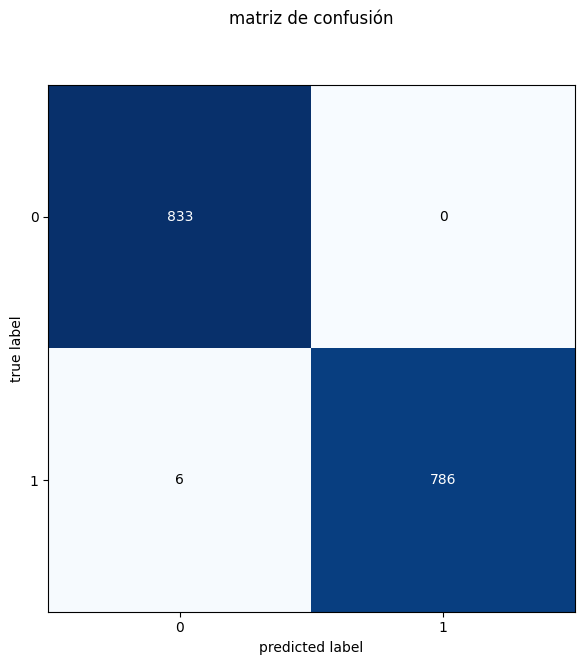

In [506]:
##en el plot de matriz de confusión podemos observar en la diagonal principal los elementos que fueron correctamente clasificados
## podemos observar que la cantidad de elementos clasificados varia en este caso en relación al random forest
#confusión
y_pred = tdm.predict(X_test)
y_proba= tdm.predict_proba(X_test)
matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat= matrix, figsize=(6,6), show_normed=False)
plt.tight_layout()
plt.title('matriz de confusión', y=1.1)

In [507]:
#precisión
precision_score(y_test, y_pred, average='micro')

0.9963076923076923

In [508]:
#recall
recall_score(y_test, y_pred, average='micro')

0.9963076923076923

In [509]:

#f1_score
f1_score(y_test,y_pred, average='micro')

0.9963076923076923

In [510]:
##accuracy
metrics.accuracy_score(y_test, y_pred)

0.9963076923076923

In [511]:
y_score1 = tdm.predict_proba(X_test)[:,1]
y_score1

array([1.        , 0.00530504, 1.        , ..., 0.00530504, 1.        ,
       1.        ])

In [512]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1, pos_label=1)

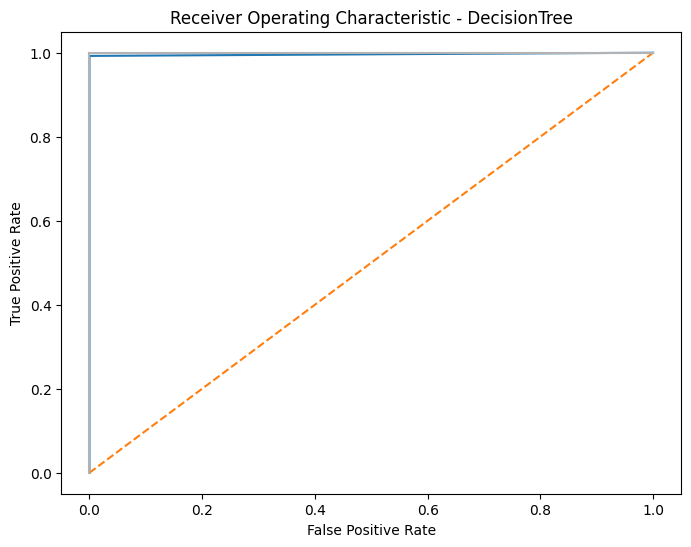

In [513]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***Logistic Classifier*** <a name="tree"></a>

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.25, random_state=16)

In [515]:
log = LogisticRegression()
log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [516]:
y_pred = log.predict(X_test)

-Métricas Modelo

In [517]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1050,    3],
       [   2,  976]])

Text(0.5, 427.9555555555555, 'Prediction')

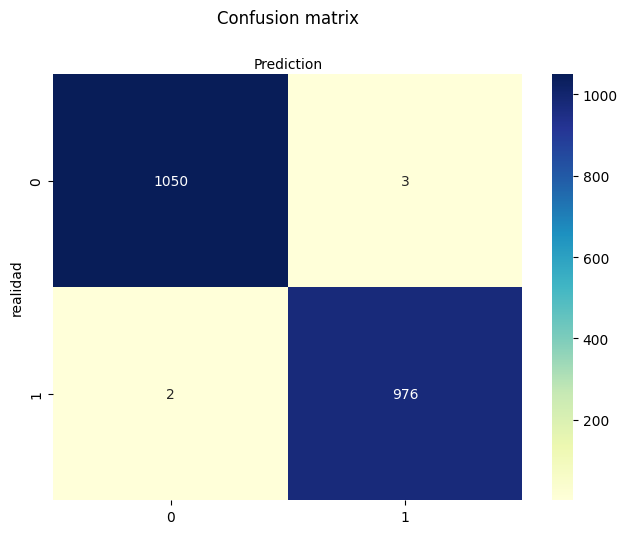

In [518]:
##graficamos la matriz de confusión (mapa de calor)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('realidad')
plt.xlabel('Prediction')

In [519]:
#precisión
precision_score(y_test, y_pred, average='micro')

0.9975381585425899

In [520]:
#recall
recall_score(y_test, y_pred, average='micro')

0.9975381585425899

In [521]:
#f1_score
f1_score(y_test,y_pred, average='micro')

0.9975381585425899

In [522]:
##accuracy
metrics.accuracy_score(y_test, y_pred)

0.9975381585425899

In [523]:
y_score_1= tdm.predict_proba(X_test)[:,1]